# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to deomstrat functionality rather than be a tutorial.

In [1]:
%matplotlib inline
import datacube

In [2]:
dc = datacube.Datacube(config='/home/simonaoliver/.datacube.conf')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://simonaoliver@:5432/datacube)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [3]:
products = dc.list_products()
#products.loc[products['product'] == h8_ahi_brf_granule]
products.loc[products['name'] == 'modis_mcd43a1_tile']
#products

,name,description,platform,product_type,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,
20,modis_mcd43a1_tile,MODIS 500 metre MCD43A1,AQUA_TERRA,MCD43A1,MODIS,HDF4_EOS:EOS_GRID,NaN,NaN,NaN,NaN


## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [4]:
measurements = dc.list_measurements()
#measurements.loc[measurements[['product'] == 'h8_ahi_brf_granule']]
#measurements.loc[measurements[['product'] == 'ls5_nbar_albers']]
measurements

aliases  dtype  \
product           measurement                                                   
ls5_nbar_scene    1                                     [band_1, blue]  int16   
                  2                                    [band_2, green]  int16   
                  3                                      [band_3, red]  int16   
                  4                                      [band_4, nir]  int16   
                  5                                    [band_5, swir1]  int16   
                  7                                    [band_7, swir2]  int16   
ls5_nbart_scene   1                                     [band_1, blue]  int16   
                  2                                    [band_2, green]  int16   
                  3                                      [band_3, red]  int16   
                  4                                      [band_4, nir]  int16   
                  5                                    [band_5, swir1]  int16   
                  7                                    [band_7, swir2]  int16   
ls5_pq_scene      pqa                              [qa_flags, quality]  int16   
ls5_ledaps_scene  sr_band1                              [band_1, blue]  int16   
                  sr_band2                             [band_2, green]  int16   
                  sr_band3                               [band_3, red]  int16   
                  sr_band4                               [band_4, nir]  int16   
                  sr_band5                             [band_5, swir1]  int16   
                  sr_band7                             [band_7, swir2]  int16   
                  cfmask                                [mask, CFmask]  uint8   
                  cfmask_conf                            [mask_config]  uint8   
                  sr_adjacent_cloud_qa                [adjacent_cloud]  uint8   
                  sr_atmos_opacity      [atmospheric_opacity, opacity]  int16   
                  sr_cloud_qa                                  [cloud]  uint8   
                  sr_cloud_shadow_qa                    [cloud_shadow]  uint8   
                  sr_ddv_qa                                      [ddv]  uint8   
                  sr_fill_qa                                    [fill]  uint8   
                  sr_land_water_qa                        [land_water]  uint8   
                  sr_snow_qa                                    [snow]  uint8   
ls7_nbar_scene    1                                     [band_1, blue]  int16   
...                                                                ...    ...   
ls7_ledaps_albers red                                    [band_3, red]  int16   
                  nir                                    [band_4, nir]  int16   
                  swir1                                [band_5, swir1]  int16   
                  swir2                                [band_7, swir2]  int16   
                  cf_mask                               [mask, CFmask]  int16   
                  cf_mask_conf                           [mask_config]  int16   
                  adjacent_cloud_qa                   [adjacent_cloud]  int16   
                  atmos_opacity         [atmospheric_opacity, opacity]  int16   
                  cloud_qa                                     [cloud]  int16   
                  cloud_shadow_qa                       [cloud_shadow]  int16   
                  ddv_qa                                         [ddv]  int16   
                  fill_qa                                       [fill]  int16   
                  land_water_qa                           [land_water]  int16   
                  snow_qa                                       [snow]  int16   
ls8_ledaps_albers coastal_aerosol            [band_1, coastal_aerosol]  int16   
                  blue                                  [band_2, blue]  int16   
                  green                                [band_3, green]  int16   
             

## Retrieving data


The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [27]:
nbar = dc.load(product='modis_mcd43a4_sinusoidal', x=(139.50, 140.0), y=(-35.5, -36.0))
nbar

<xarray.Dataset>
Dimensions:  (time: 1, x: 250, y: 113)
Coordinates:
  * time     (time) datetime64[ns] 2000-02-26
  * y        (y) float64 -3.947e+06 -3.948e+06 -3.948e+06 -3.949e+06 ...
  * x        (x) float64 1.255e+07 1.255e+07 1.255e+07 1.255e+07 1.255e+07 ...
Data variables:
    red      (time, y, x) int16 913 1004 787 898 954 979 744 763 923 972 968 ...
    nir      (time, y, x) int16 2892 2779 2845 2694 2714 2914 3176 2999 2901 ...
    blue     (time, y, x) int16 444 489 421 438 470 434 401 394 427 449 506 ...
    green    (time, y, x) int16 839 884 759 864 910 957 819 762 867 910 936 ...
    swir1    (time, y, x) int16 3562 3649 3376 3277 3367 3674 3954 3766 3583 ...
    swir2    (time, y, x) int16 3312 3347 2970 2932 3056 3309 3181 3262 3257 ...
    swir3    (time, y, x) int16 2022 1846 1659 1616 1734 1879 1595 1700 1862 ...
Attributes:
    crs: PROJCS["unnamed",
GEOGCS["Unknown datum based upon the custom spheroid",
    DATUM["Not specified (based on custom spheroid)",
    

We can look at the data by name directly, or through the `data_vars` dictionary:

In [28]:
nbar.data_vars

Data variables:
    red      (time, y, x) int16 913 1004 787 898 954 979 744 763 923 972 968 ...
    nir      (time, y, x) int16 2892 2779 2845 2694 2714 2914 3176 2999 2901 ...
    blue     (time, y, x) int16 444 489 421 438 470 434 401 394 427 449 506 ...
    green    (time, y, x) int16 839 884 759 864 910 957 819 762 867 910 936 ...
    swir1    (time, y, x) int16 3562 3649 3376 3277 3367 3674 3954 3766 3583 ...
    swir2    (time, y, x) int16 3312 3347 2970 2932 3056 3309 3181 3262 3257 ...
    swir3    (time, y, x) int16 2022 1846 1659 1616 1734 1879 1595 1700 1862 ...

In [29]:
nbar.variables.keys()

['time',
 'y',
 'x',
 u'red',
 u'nir',
 u'blue',
 u'green',
 u'swir1',
 u'swir2',
 u'swir3']

In [30]:
import plotly

plotly.offline.init_notebook_mode()

# Plot every sensor band for a given sensor
def plotallbands(xarrayobj):
    plotlydatalist = []
    for key in xarrayobj.keys():
        if hasattr(xarrayobj[key], 'spectral_definition'):
            plotlydatalist.append({"x": xarrayobj[key].spectral_definition['wavelength'],\
                                "y": xarrayobj[key].spectral_definition['response'],"name": (key)})

    plotly.offline.iplot({ "data": plotlydatalist,"layout": {"title": 'Insert title here'}})
#TODO API function - maybe <xarray.core.dataset.Dataset>
plotallbands(nbar)


## Plotting data
We can select the data at a particular time and see what is there. We can use pandas-style labels to select a time period, inclusive of the end label:

In [23]:
autumn = nbar.green.loc['1998-9':'2016-12']
autumn.shape

(1, 2328, 1940)

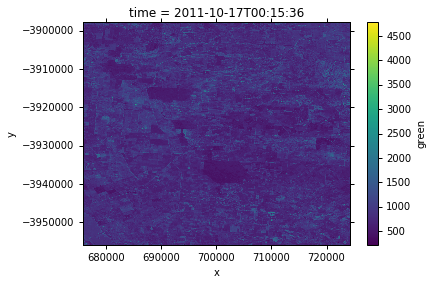

In [24]:
from matplotlib import pyplot as plt
#plt.imshow(nbar.green.isel(time=0))
t = nbar.green.isel(time=0)
t.where(t>0).plot()

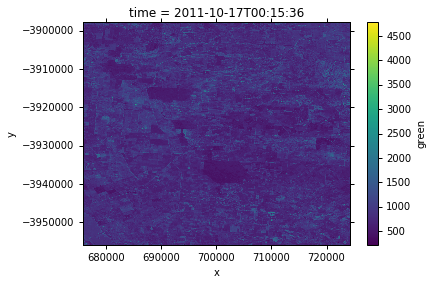

In [25]:
autumn.plot()

In [12]:
autumn

<xarray.DataArray 'green' (time: 1, y: 2328, x: 1940)>
array([[[1891, 1868, 1822, ...,  257,  257,  257],
        [1856, 1840, 1819, ...,  257,  257,  257],
        [1810, 1840, 1819, ...,  257,  257,  257],
        ..., 
        [4293, 3272, 3272, ..., 1178, 1340, 1291],
        [4143, 4027, 4027, ..., 1155, 1261, 1274],
        [3404, 4775, 4775, ..., 1460, 1520, 1455]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-31T00:27:41
  * y        (y) float64 -3.898e+06 -3.898e+06 -3.898e+06 -3.898e+06 ...
  * x        (x) float64 6.758e+05 6.759e+05 6.759e+05 6.759e+05 6.759e+05 ...
Attributes:
    units: 1
    spectral_definition: {u'wavelength': [512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576

-9999


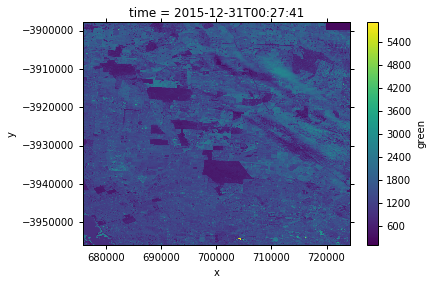

In [13]:
autumn_valid = autumn.where(autumn != autumn.attrs['nodata'])
autumn_valid.plot()
print autumn.attrs['nodata']

In [14]:
from datacube.storage import masking
import pandas
import xarray
pq = nbar.cf_mask
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')


,values,bits,description
cloud_confidence,"{u'1': u'water', u'0': u'clear', u'3': u'snow'...","[0, 1, 2, 3, 4, 5, 6, 7]",CFmask


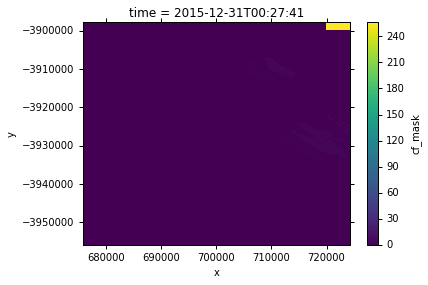

In [15]:
pq.plot()

In [39]:
#concated = xarray.concat(nbar.cf_mask,nbar.cf_mask_conf)
help(xarray.concat)

Help on function concat in module xarray.core.combine:

concat(objs, dim=None, data_vars='all', coords='different', compat='equals', positions=None, indexers=None, mode=None, concat_over=None)
    Concatenate xarray objects along a new or existing dimension.
    
    Parameters
    ----------
    objs : sequence of Dataset and DataArray objects
        xarray objects to concatenate together. Each object is expected to
        consist of variables and coordinates with matching shapes except for
        along the concatenated dimension.
    dim : str or DataArray or pandas.Index
        Name of the dimension to concatenate along. This can either be a new
        dimension name, in which case it is added along axis=0, or an existing
        dimension name, in which case the location of the dimension is
        unchanged. If dimension is provided as a DataArray or Index, its name
        is used as the dimension to concatenate along and the values are added
        as a coordinate.
    dat

In [34]:
good_data = masking.make_mask(pq, cfmask='clear')
autumn_good_data = good_data.pixelquality.loc['1998-9':'2016-12']
autumn_good_data.plot()

TypeError: unsupported operand type(s) for <<: 'unicode' and 'int'